In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from astropy.io import ascii

In [15]:
data = ascii.read('/Users/yaolun/bhr71/data/BHR71_queue_SEIP.tbl')

In [16]:
print data.colnames

['objid', 'crowded', 'badbkgmatch', 'ra', 'dec', 'l', 'b', 'nmatches', 'nreject', 'nbands', 'i1_fluxtype', 'i2_fluxtype', 'i3_fluxtype', 'i4_fluxtype', 'm1_fluxtype', 'i1_fluxflag', 'i2_fluxflag', 'i3_fluxflag', 'i4_fluxflag', 'm1_fluxflag', 'i1_softsatflag', 'i2_softsatflag', 'i3_softsatflag', 'i4_softsatflag', 'i1_f_ap1', 'i1_df_ap1', 'i1_f_ap2', 'i1_df_ap2', 'i1_f_ap1_bf', 'i1_df_ap1_bf', 'i1_f_ap2_bf', 'i1_df_ap2_bf', 'i1_f_ap1_3siglim', 'i1_f_ap2_3siglim', 'i2_f_ap1', 'i2_df_ap1', 'i2_f_ap2', 'i2_df_ap2', 'i2_f_ap1_bf', 'i2_df_ap1_bf', 'i2_f_ap2_bf', 'i2_df_ap2_bf', 'i2_f_ap1_3siglim', 'i2_f_ap2_3siglim', 'i3_f_ap1', 'i3_df_ap1', 'i3_f_ap2', 'i3_df_ap2', 'i3_f_ap1_bf', 'i3_df_ap1_bf', 'i3_f_ap2_bf', 'i3_df_ap2_bf', 'i3_f_ap1_3siglim', 'i3_f_ap2_3siglim', 'i4_f_ap1', 'i4_df_ap1', 'i4_f_ap2', 'i4_df_ap2', 'i4_f_ap1_bf', 'i4_df_ap1_bf', 'i4_f_ap2_bf', 'i4_df_ap2_bf', 'i4_f_ap1_3siglim', 'i4_f_ap2_3siglim', 'm1_f_psf', 'm1_df_psf', 'm1_f_ap', 'm1_df_ap', 'm1_f_psf_bf', 'm1_df_psf_bf',

## Location around BHR71

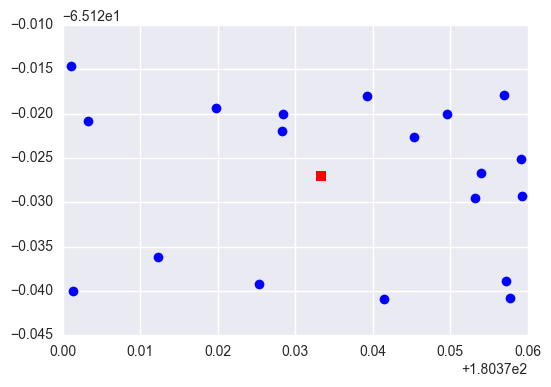

In [17]:
# Coordinates of BHR71:
ra_cen  = 180.403375
dec_cen = -65.14700556
plt.plot(data['ra'], data['dec'],'o',mec='None', color='b')
plt.plot(ra_cen, dec_cen, 's', mec='None', color='r')

To retain only the most robust flux densities, apply the following cuts:
1. Make a SNR cut. Each source has 5 columns ending in “fluxtype”, four for each of the IRAC
channels and one for MIPS-24. Flux densities with SNR>=3 for IRAC and >=10 for MIPS1 have
*fluxtype=1.
2. Eliminate IRAC flux densities that may be affected by a nearby saturated source or a nearby
extended source. There are four “fluxflag” columns, one for each IRAC channel. Choose
*fluxflag=0.
3. Eliminate MIPS flux densities that may be affected by a nearby saturated source or a nearby
extended source by choosing m1_brtfrac<0.5 and m1_extfrac<0.5.
4. Remove IRAC flux densities affected by soft saturation. There are four *softsatflag columns,
one for each IRAC channel. Choose *softsatflag=0.
5. As long as you have filtered by *fluxtype = 1 (item #1 above), then you can use the following
rules. For IRAC, use the 3.8 arcsec diameter aperture flux densities and the associated
uncertainties (columns *f_ap1). For MIPS, use the PSF flux density and the associated
uncertainties (m1_f_psf).

## Color analysis

### Zero-magnitude flux for IRAC bands

| Wavelength(um) |  F_v0(Jy)  |
|----------------|------------|
| IRAC1 (3.6 um) | 280.9+/-4.1|
| IRAC2 (4.5 um) | 179.7+/-2.6|
| IRAC3 (5.8 um) | 115.0+/-1.7|
| IRAC4 (8.0 um) | 64.9+/-0.9 |

In [29]:
def flux_to_mag(flux, band_ind):
    import numpy as np
    zeromag_flux = [280.9,179.7,115.0,64.9]
    
    return -2.5*np.log10(flux/zeromag_flux[band_ind])

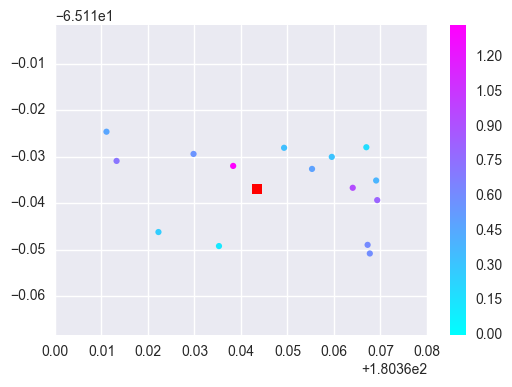

In [31]:
# source selection
# fluxflag doesn't work here.  If applied, only two/zero sources would be selected.
selector = (data['i1_fluxtype'] == 1) & (data['i1_softsatflag'] == 0) & \
           (data['i2_fluxtype'] == 1) & (data['i2_softsatflag'] == 0)
# IRAC1 - IRAC2
irac_color = flux_to_mag(data['i1_f_ap1'][selector]*1e-6, 0) - flux_to_mag(data['i2_f_ap1'][selector]*1e-6,1)

cmap = plt.cm.cool
norm = mpl.colors.Normalize(vmin=irac_color.min(),vmax=irac_color.max())

# Coordinates of BHR71:
ra_cen  = 180.403375
dec_cen = -65.14700556
plt.plot(ra_cen, dec_cen, 's', mec='None', color='r')

sc = plt.scatter(data['ra'][selector], data['dec'][selector], c=irac_color,
            marker='o', s=20, edgecolor='None', vmin=0, vmax=irac_color.max(),
            cmap=plt.cm.cool)
plt.colorbar(sc)
plt.xlim([180.36,180.44])
plt.ylim([-65.15,-65.14])
plt.axes().set_aspect('equal', 'datalim')

In [68]:
def color_fig(irac_color, label):
    import aplpy as apl
    import matplotlib as mpl
    from astropy import units as u
    from astropy.coordinates import SkyCoord
    import os
    sns.set_style("white")

    # Coordinates of BHR71:
    ra_cen  = 180.403375
    dec_cen = -65.14700556
    irs1 = SkyCoord('12 01 36.81 -65 08 49.22', unit=(u.hourangle, u.deg))
    irs2 = SkyCoord('12 01 34.09 -65 08 47.36', unit=(u.hourangle, u.deg))
    # At 178 pc, 10000 AU correspond to 57.96 arcsec

    irac1 = '/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC1_mosaic.fits'

    fig = plt.figure(figsize=(14,12))

    im = apl.FITSFigure(irac1,north=True, figure=fig, subplot=[0.1,0.1,0.85,1.0])
    # im.frame.set_linewidth(2)
    # im.frame.set_color('white')
    # cmap = plt.cm.CMRmap
    cmap = plt.cm.gray
    im.show_colorscale(cmap=cmap,stretch='log', vmin=None, vmax=None)

    im.recenter(irs1.ra.degree,irs1.dec.degree,radius=0.03)

    im.show_markers(irs1.ra.degree, irs1.dec.degree, marker='+', c='Lime', s=200, linewidth=2)

    # plot the stars with their observed colors
    # IRAC1 - IRAC2
    
    cmap = plt.cm.Reds
    norm = mpl.colors.Normalize(vmin=irac_color.min(),vmax=irac_color.max())

    for i in range(len(irac_color)):
        im.show_markers(data['ra'][selector][i], data['dec'][selector][i], marker='o',
                        edgecolor=cmap(irac_color[i]), facecolor='None', s=400, linewidth=5)

    ax_color = fig.add_axes([0.95, 0.1, 0.05, 1.0])
    cb = mpl.colorbar.ColorbarBase(ax_color, cmap=cmap, norm=norm, orientation='vertical')
    cb.set_label(label, fontsize=24)
    cb_obj = plt.getp(cb.ax.axes, 'yticklabels')
    plt.setp(cb_obj,fontsize=22)

    im.set_nan_color('black')
    im.tick_labels.set_font(size=22)

    # im.add_colorbar()
    # im.colorbar.set_font(size=20)
    # im.colorbar.set_axis_label_text('Intensity (MJy sr$^{-1}$)')
    # im.colorbar.set_axis_label_font(size=20)
    im.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
    im.ticks.set_xspacing(0.03/2.5)
    im.ticks.set_yspacing(0.03/2.5)
    im.axis_labels.set_font(size=24)
    im.ticks.set_linewidth(2)
    im.ticks.set_color('white')

    im.add_scalebar(30/3600.)
    im.scalebar.set_length(30 * u.arcsecond)
    im.scalebar.set_label('30 arcsec')
    im.scalebar.set_font(size=16, weight='bold')
    im.scalebar.set(linestyle='solid', color='w', linewidth=3, corner='bottom')

    # im.save(plotdir+'/'+plotname+'.pdf',format='pdf',transparent=True, dpi=300)

INFO: Deleting work directory /var/folders/8l/wkm05hxn2qlc5vlkg7m35rzw0008sh/T/tmp4DCbBs [montage_wrapper.wrappers]
INFO: Auto-setting vmin to  1.515e-01 [aplpy.core]
INFO: Auto-setting vmax to  4.118e+01 [aplpy.core]
INFO: Deleting work directory /var/folders/8l/wkm05hxn2qlc5vlkg7m35rzw0008sh/T/tmpfFnPoJ [montage_wrapper.wrappers]
INFO: Auto-setting vmin to  1.515e-01 [aplpy.core]
INFO: Auto-setting vmax to  4.118e+01 [aplpy.core]
INFO: Deleting work directory /var/folders/8l/wkm05hxn2qlc5vlkg7m35rzw0008sh/T/tmpez2asC [montage_wrapper.wrappers]
INFO: Auto-setting vmin to  1.515e-01 [aplpy.core]
INFO: Auto-setting vmax to  4.118e+01 [aplpy.core]
INFO: Deleting work directory /var/folders/8l/wkm05hxn2qlc5vlkg7m35rzw0008sh/T/tmp8wCs_C [montage_wrapper.wrappers]
INFO: Auto-setting vmin to  1.515e-01 [aplpy.core]
INFO: Auto-setting vmax to  4.118e+01 [aplpy.core]
INFO: Deleting work directory /var/folders/8l/wkm05hxn2qlc5vlkg7m35rzw0008sh/T/tmp99loOQ [montage_wrapper.wrappers]
INFO: Auto-s

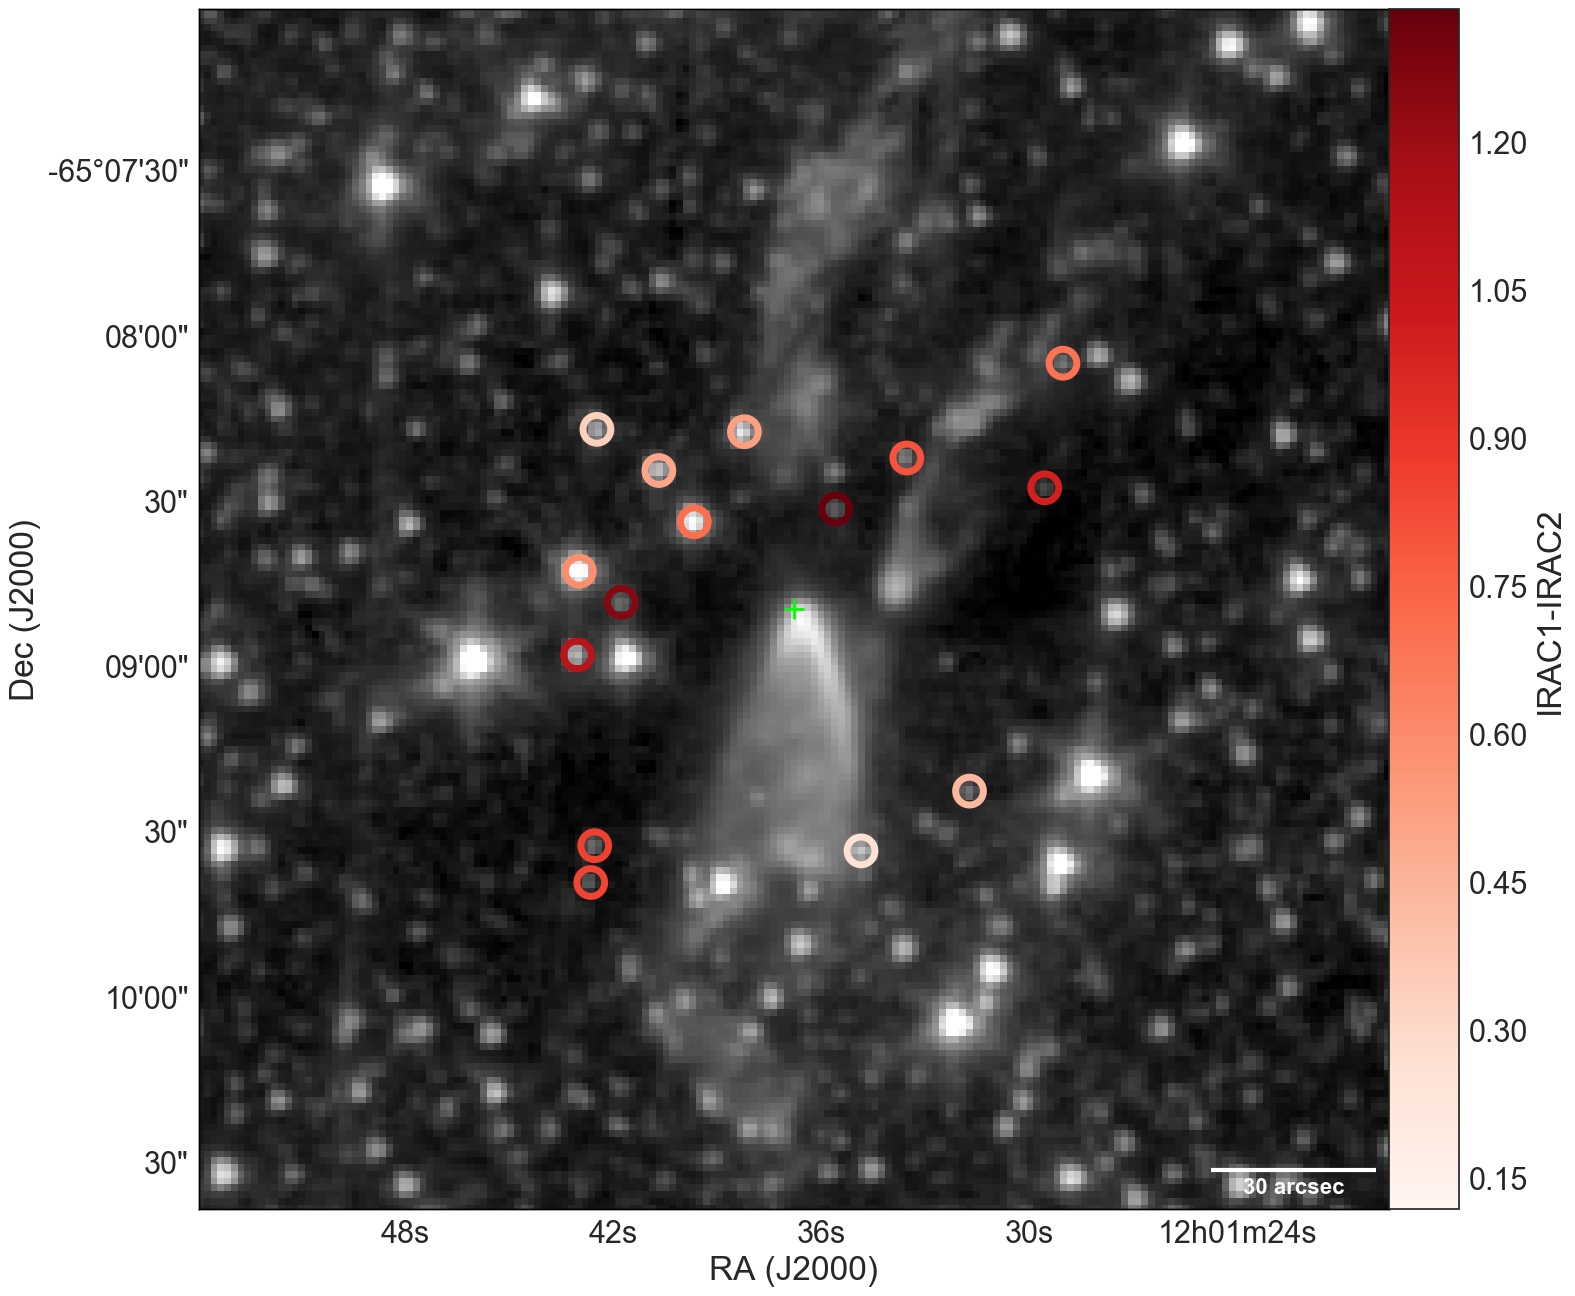

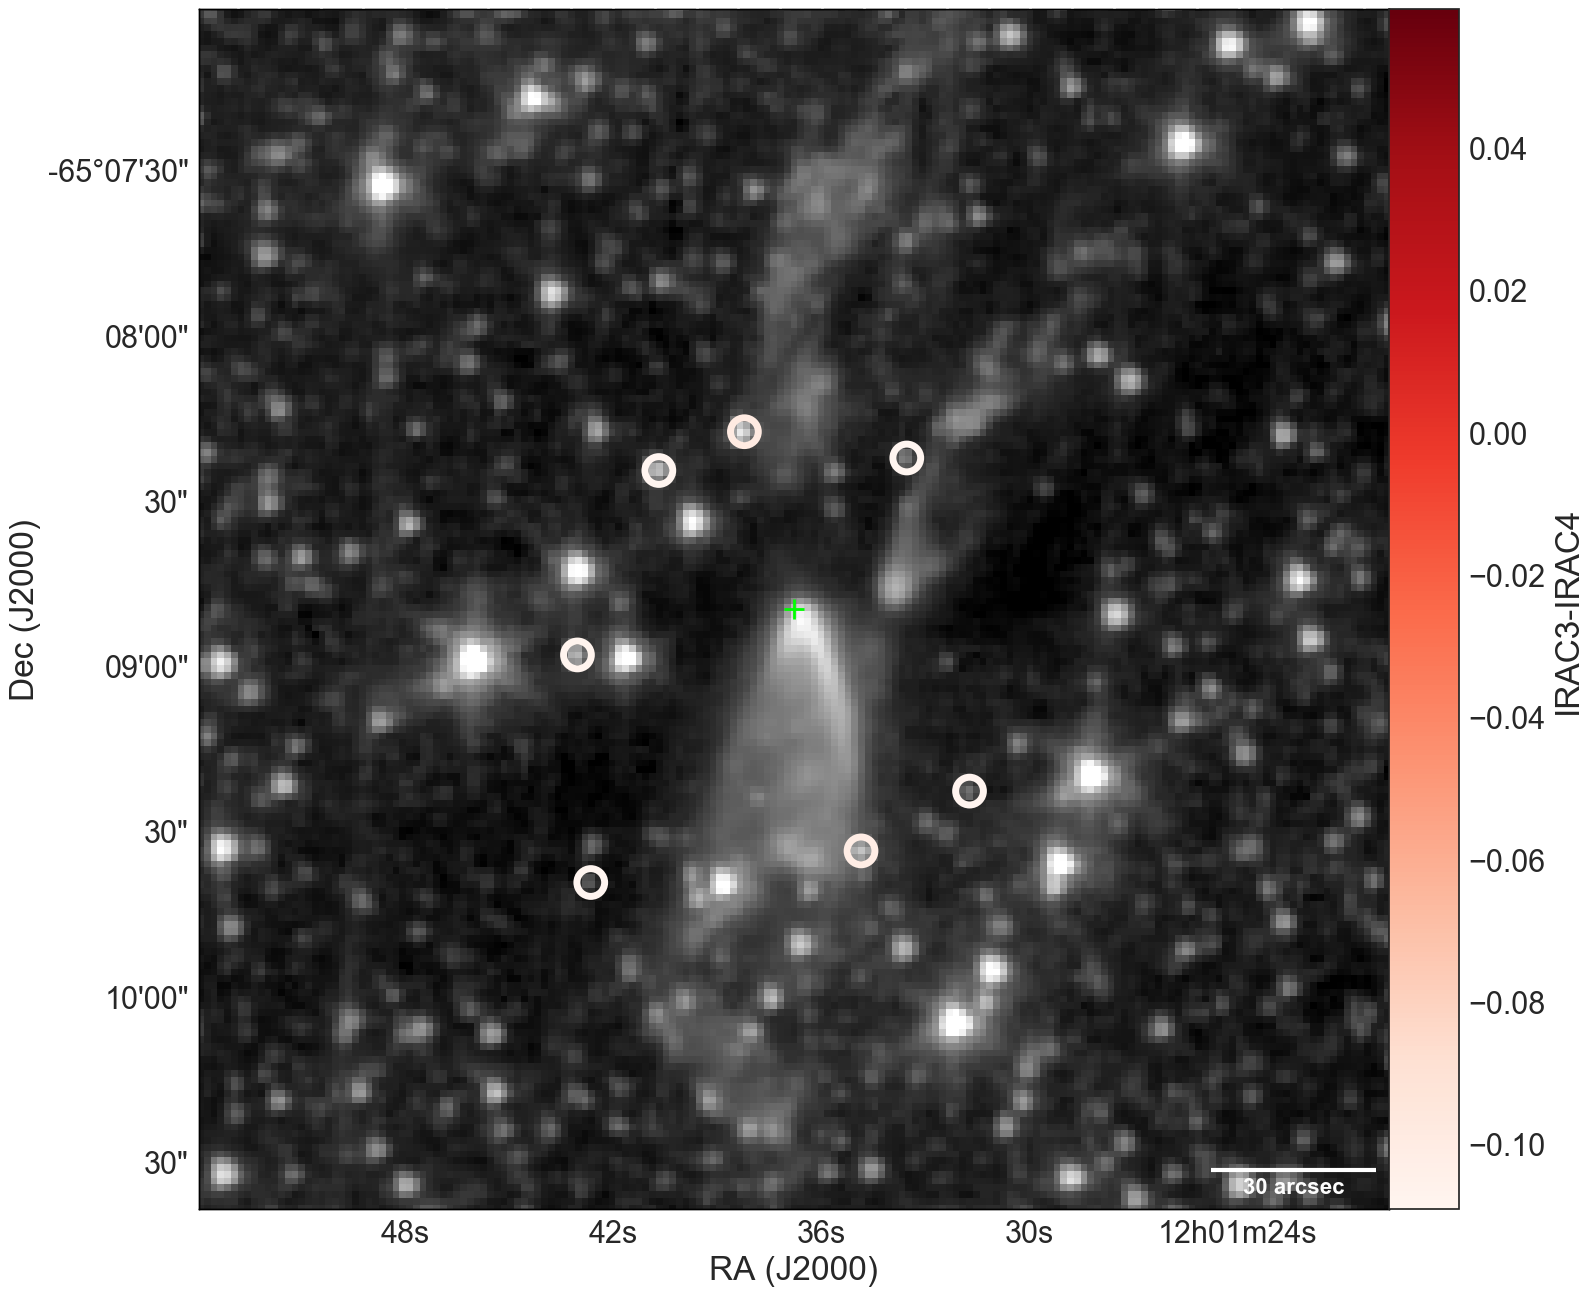

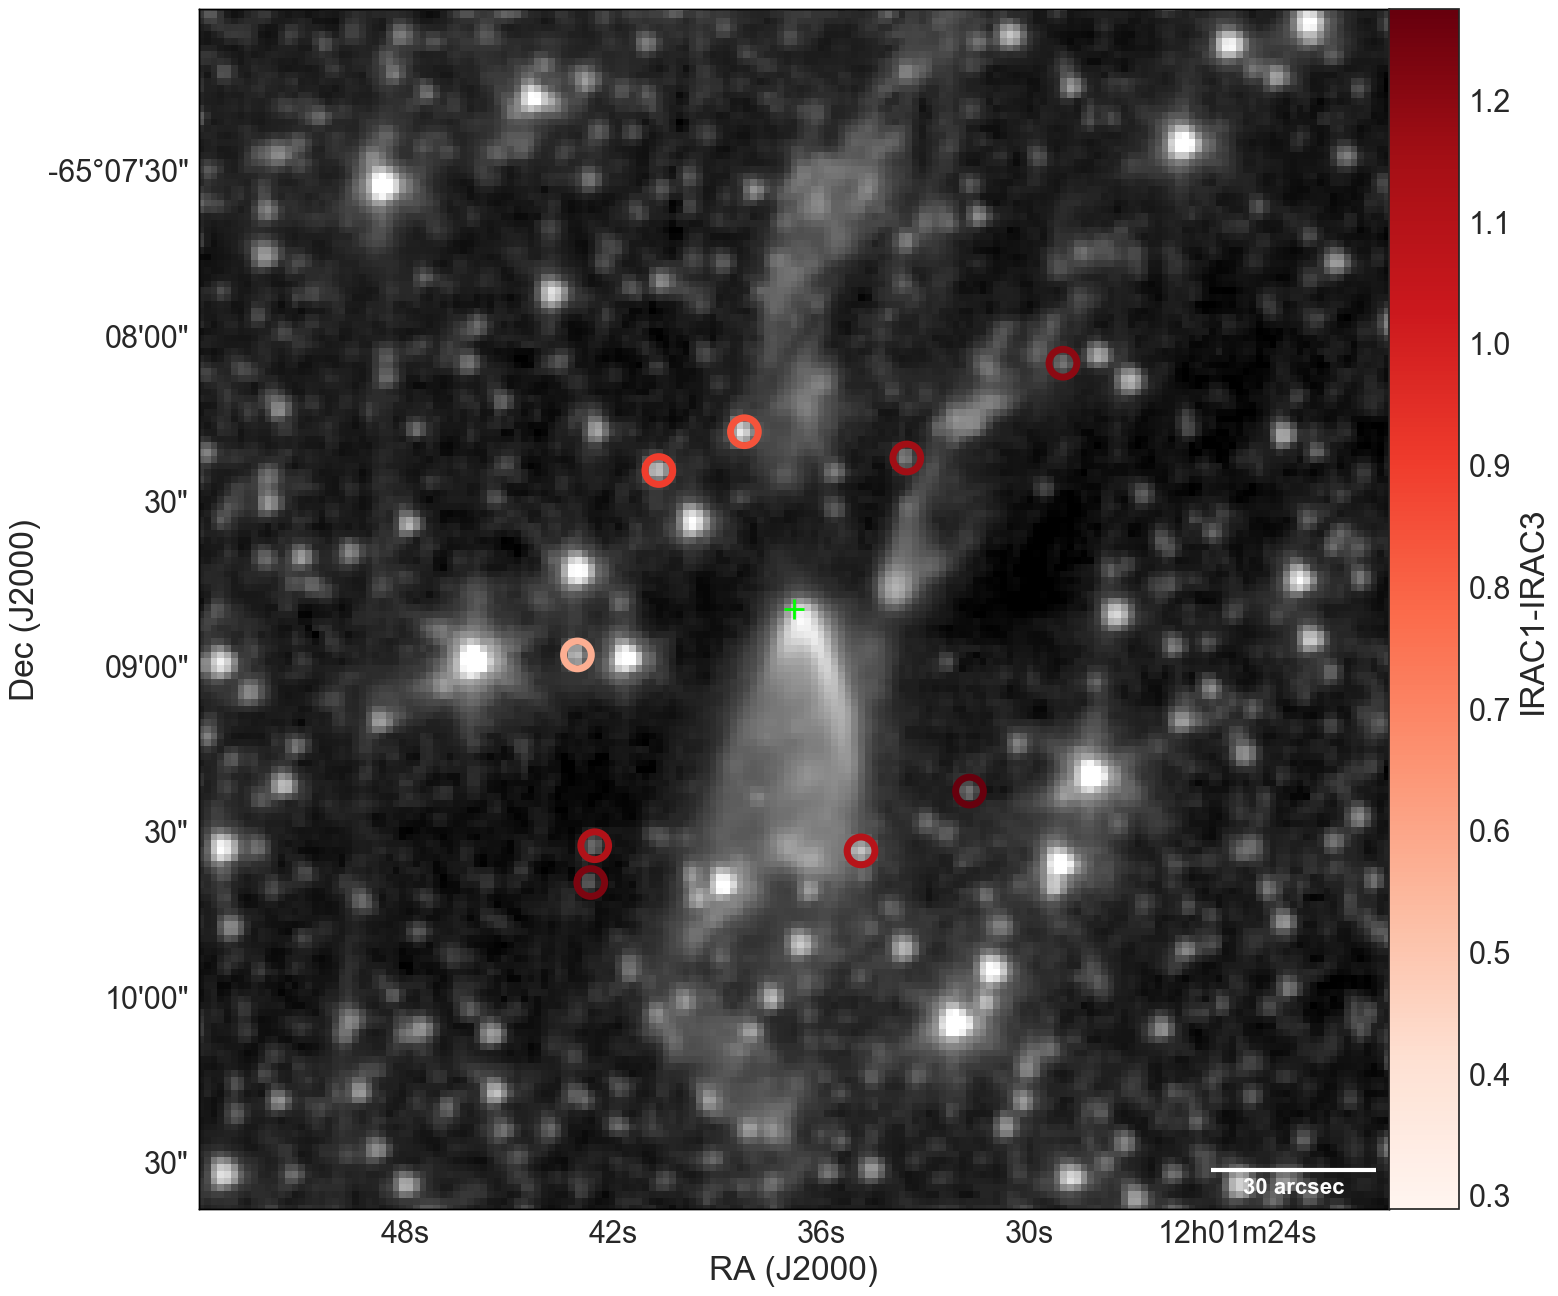

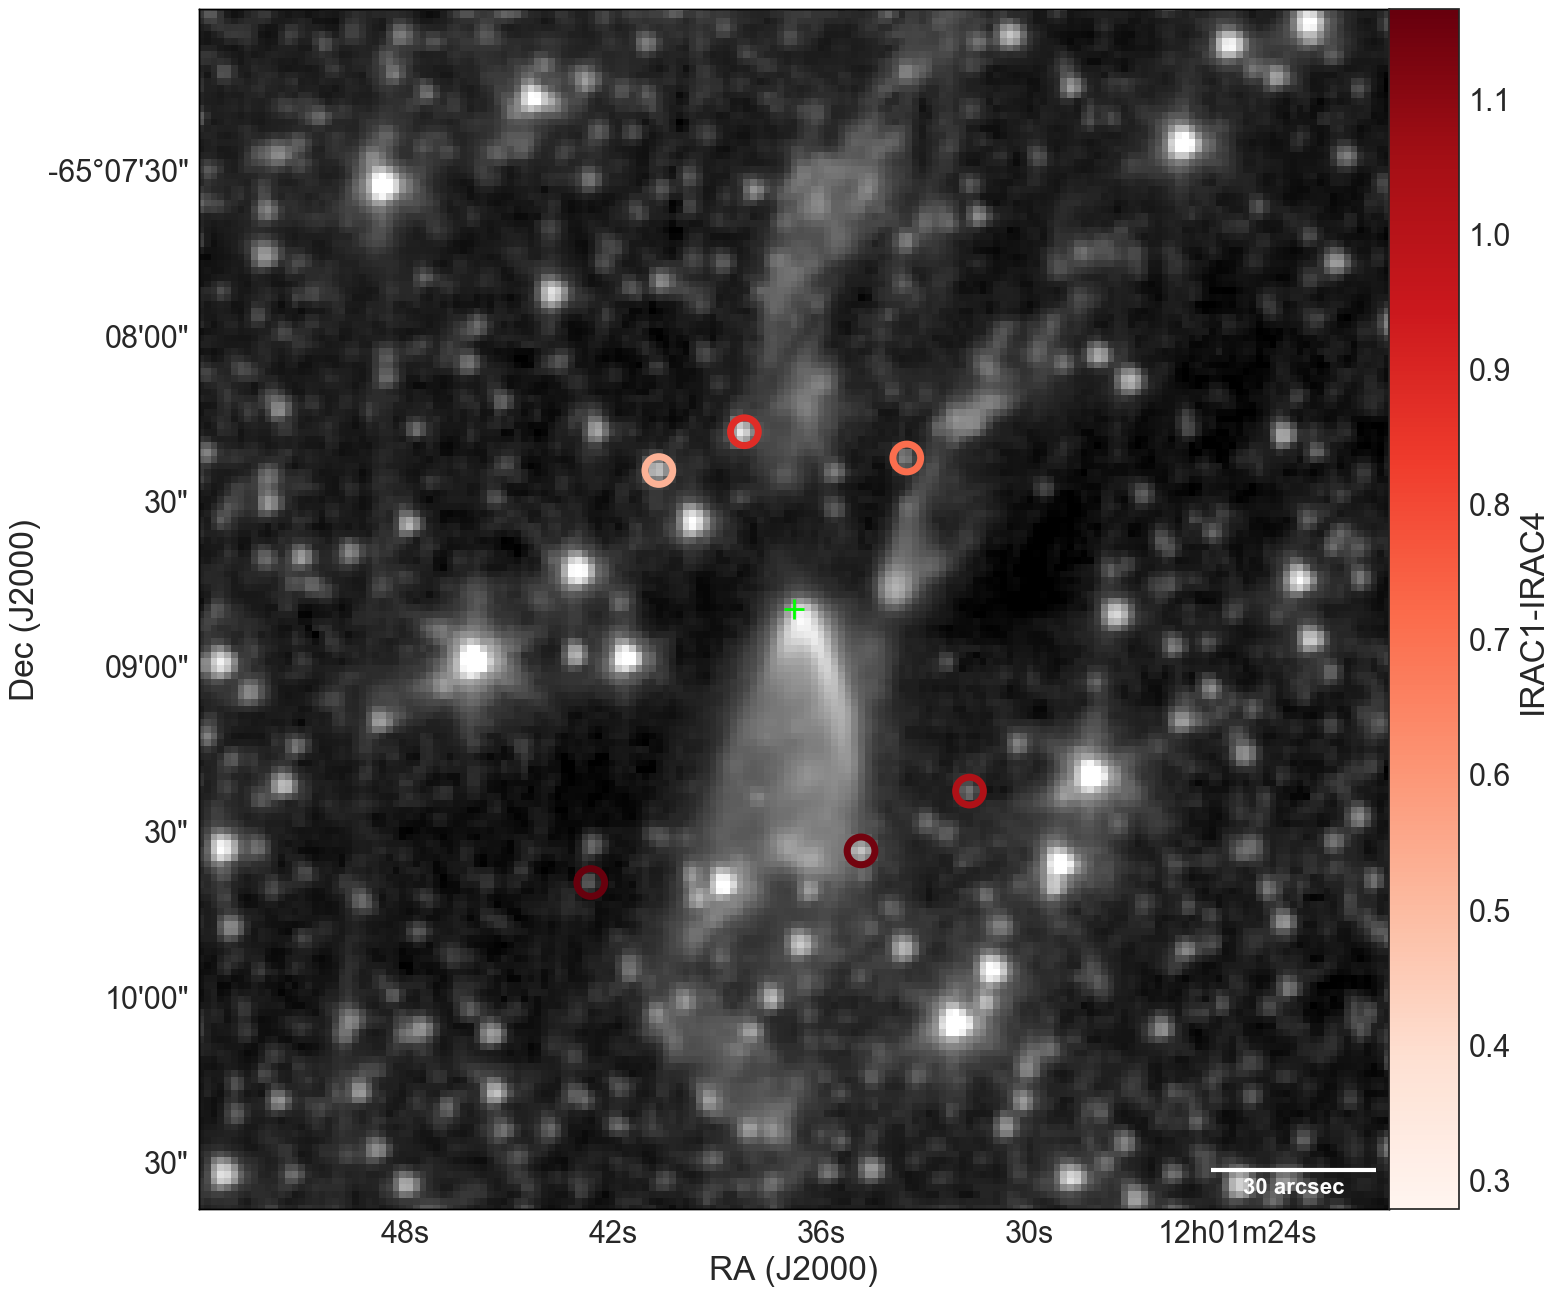

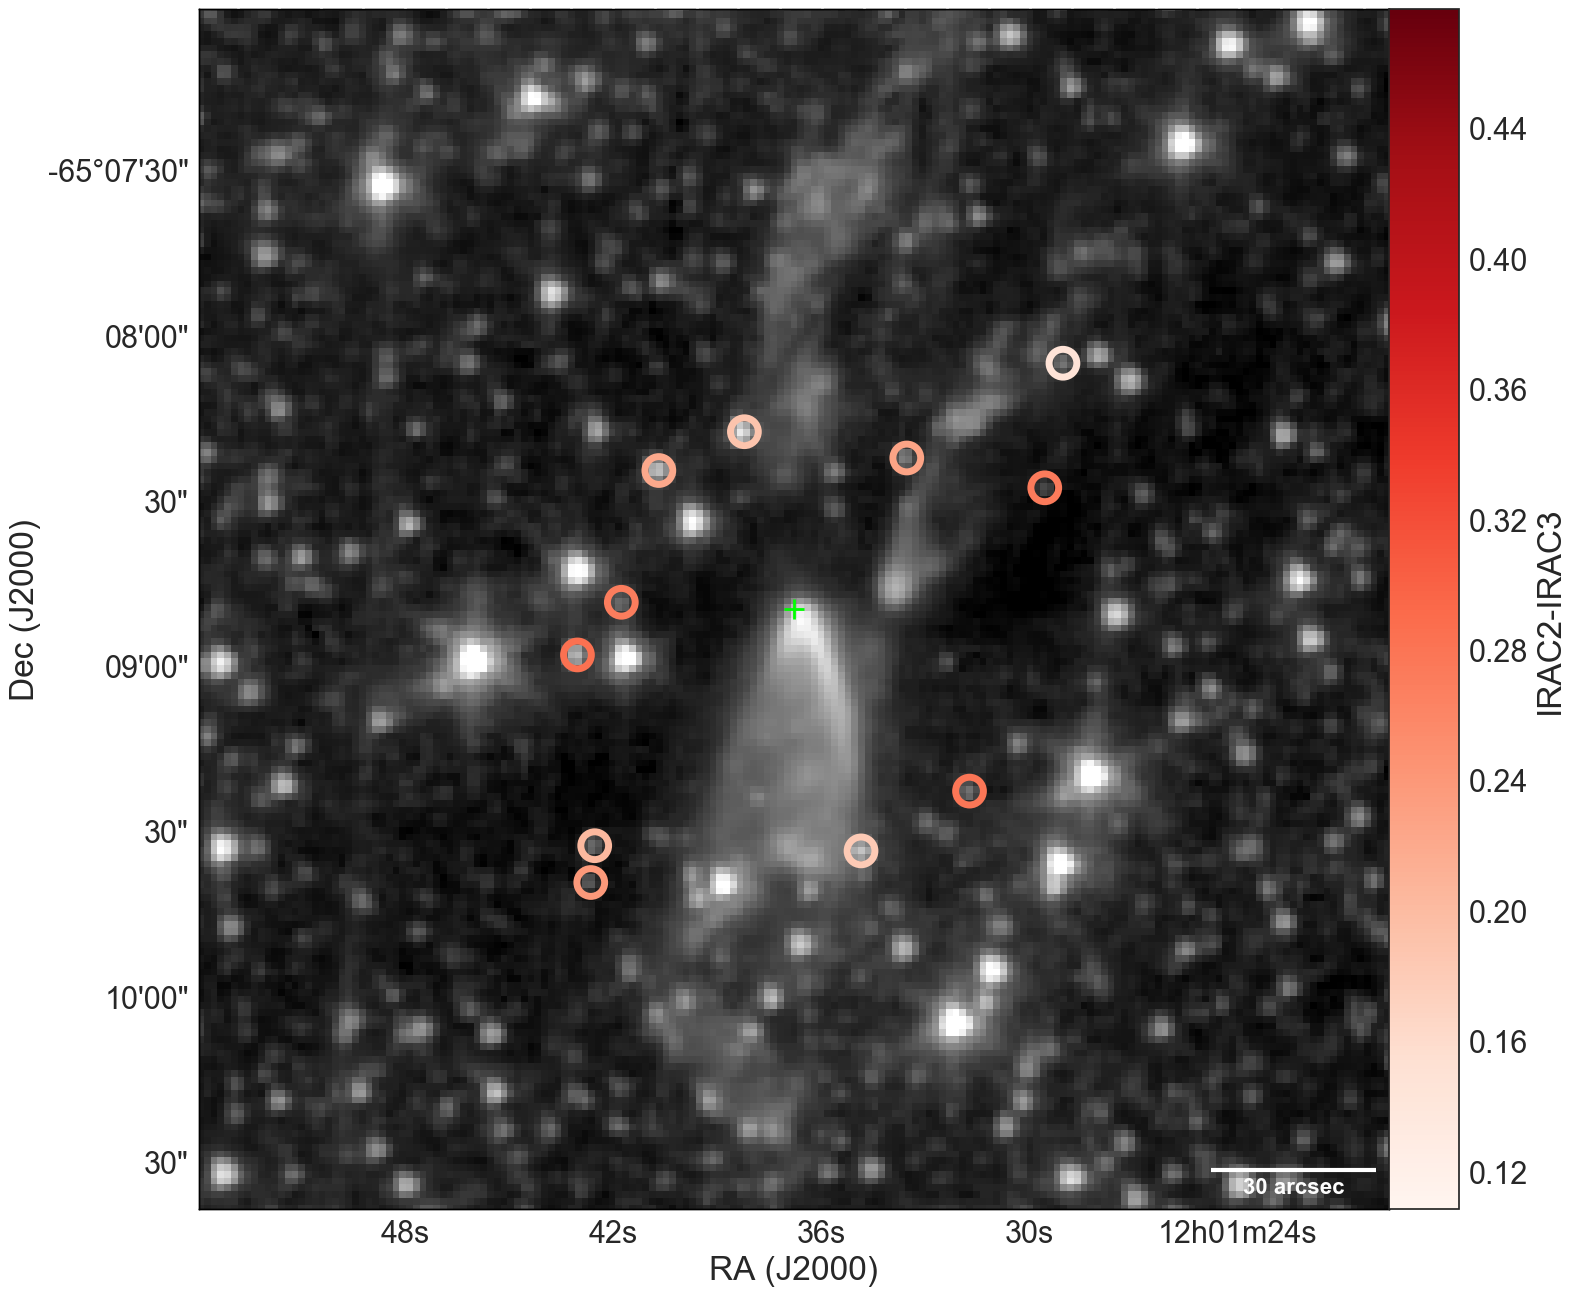

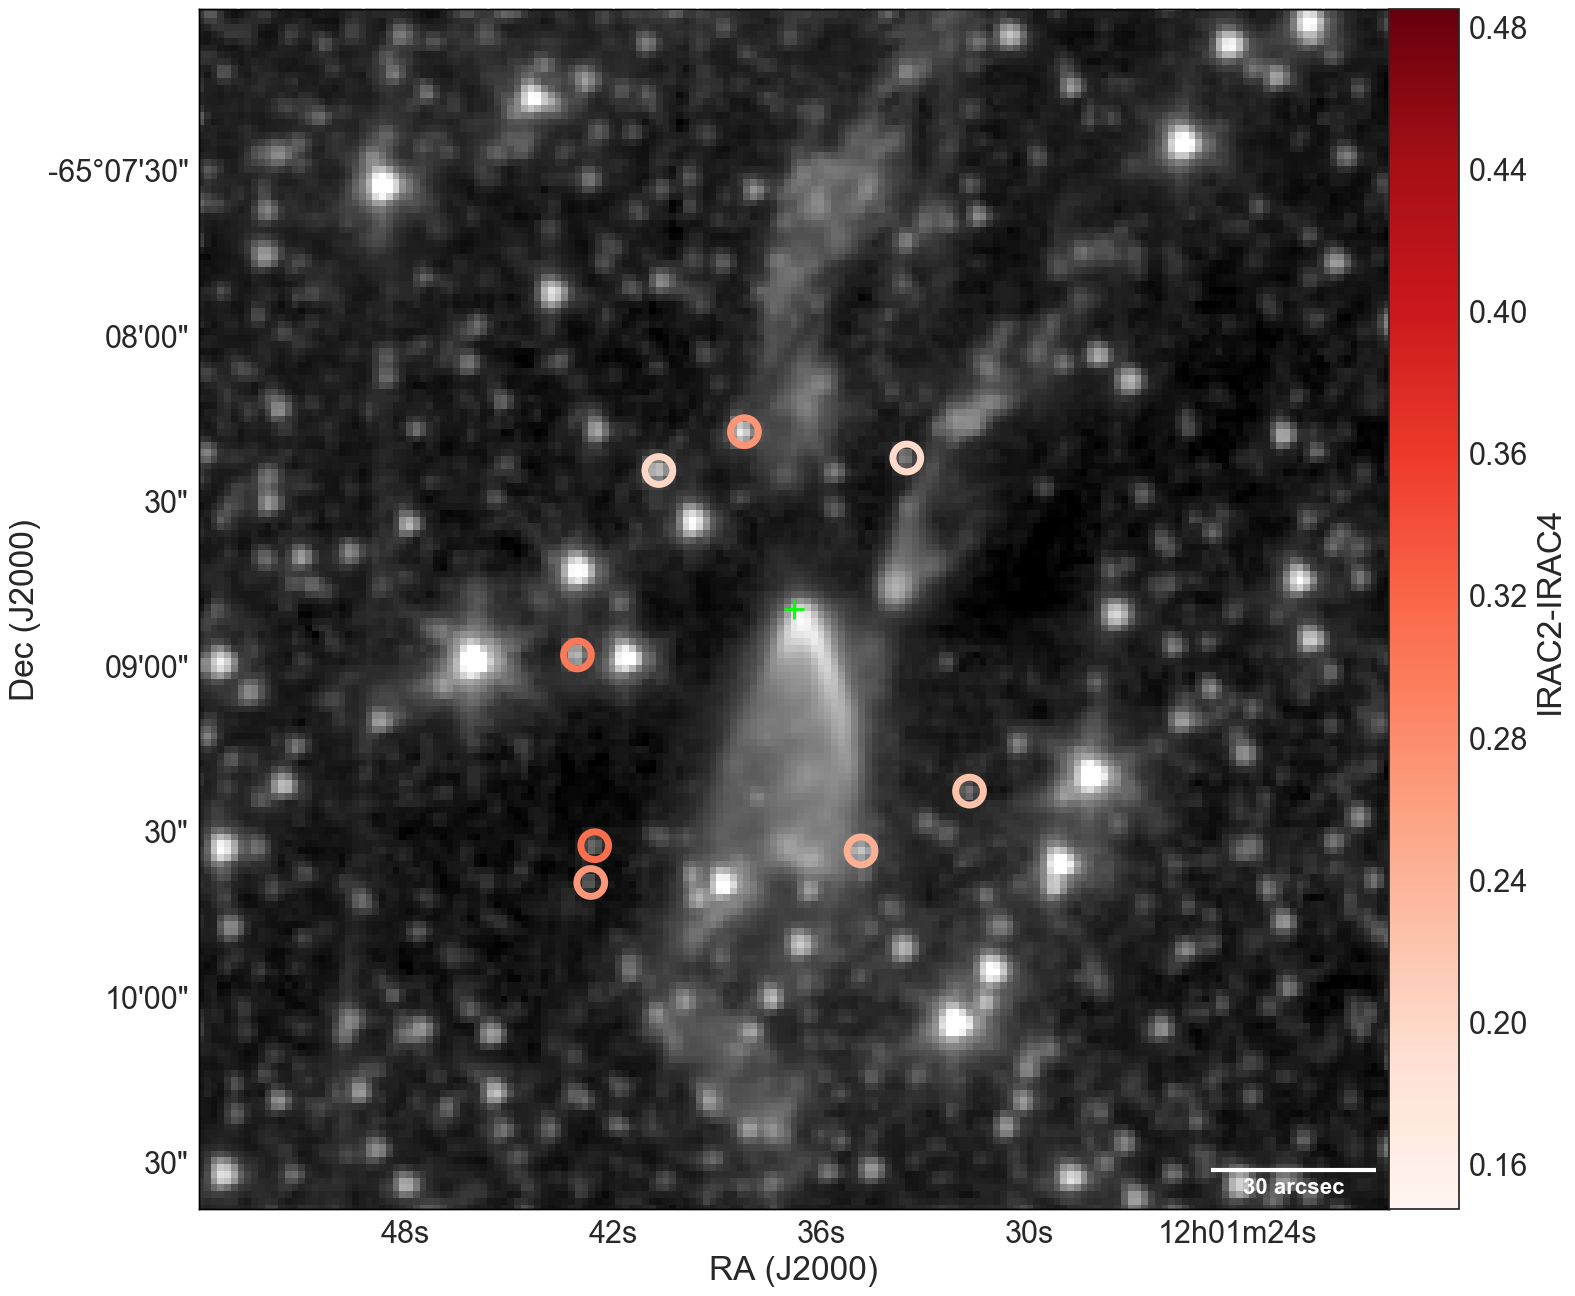

In [70]:
def FluxFlag(band1, band2):
    selector = (data[band1+'_fluxtype'] == 1) & (data[band1+'_softsatflag'] == 0) & \
               (data[band2+'_fluxtype'] == 1) & (data[band2+'_softsatflag'] == 0)
    return selector
irac_color = flux_to_mag(data['i1_f_ap1'][FluxFlag('i1','i2')]*1e-6, 0) - flux_to_mag(data['i2_f_ap1'][FluxFlag('i1','i2')]*1e-6,1)
color_fig(irac_color, 'IRAC1-IRAC2')

irac_color = flux_to_mag(data['i3_f_ap1'][FluxFlag('i3','i4')]*1e-6, 2) - flux_to_mag(data['i4_f_ap1'][FluxFlag('i3','i4')]*1e-6,3)
color_fig(irac_color, 'IRAC3-IRAC4')

irac_color = flux_to_mag(data['i1_f_ap1'][FluxFlag('i1','i3')]*1e-6, 0) - flux_to_mag(data['i3_f_ap1'][FluxFlag('i1','i3')]*1e-6,2)
color_fig(irac_color, 'IRAC1-IRAC3')

irac_color = flux_to_mag(data['i1_f_ap1'][FluxFlag('i1','i4')]*1e-6, 0) - flux_to_mag(data['i4_f_ap1'][FluxFlag('i1','i4')]*1e-6,3)
color_fig(irac_color, 'IRAC1-IRAC4')

irac_color = flux_to_mag(data['i2_f_ap1'][FluxFlag('i2','i3')]*1e-6, 1) - flux_to_mag(data['i3_f_ap1'][FluxFlag('i2','i3')]*1e-6,2)
color_fig(irac_color, 'IRAC2-IRAC3')

irac_color = flux_to_mag(data['i2_f_ap1'][FluxFlag('i2','i4')]*1e-6, 1) - flux_to_mag(data['i4_f_ap1'][FluxFlag('i2','i4')]*1e-6,3)
color_fig(irac_color, 'IRAC2-IRAC4')

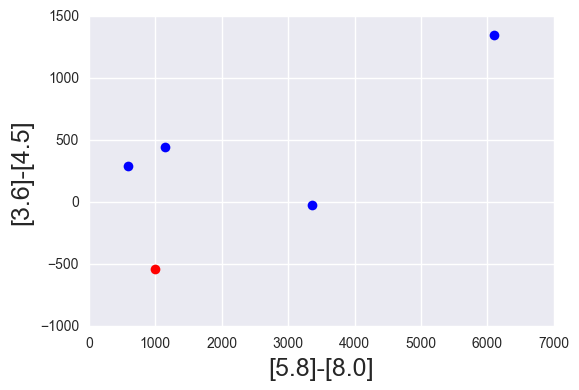

In [27]:
# source selection
# fluxflag doesn't work here.  If applied, only two/zero sources would be selected.
selector = (data['i1_fluxtype'] == 1) & (data['i1_softsatflag'] == 0) & \
           (data['i2_fluxtype'] == 1) & (data['i2_softsatflag'] == 0) & \
           (data['i3_fluxtype'] == 1) & (data['i3_softsatflag'] == 0) & \
           (data['i4_fluxtype'] == 1) & (data['i4_softsatflag'] == 0)

# Coordinates of BHR71:
ra_cen  = 180.403375
dec_cen = -65.14700556
north = selector & (data['dec'] > dec_cen)
south = selector & (data['dec'] < dec_cen)
      
# North
plt.plot(data['i3_f_ap1'][north]-data['i4_f_ap1'][north], data['i1_f_ap1'][north]-data['i2_f_ap1'][north], 'bo')
# South
plt.plot(data['i3_f_ap1'][south]-data['i4_f_ap1'][south], data['i1_f_ap1'][south]-data['i2_f_ap1'][south], 'ro')

plt.xlabel('[5.8]-[8.0]', fontsize=18)
plt.ylabel('[3.6]-[4.5]', fontsize=18)

In [ ]:
import aplpy as apl
